<a href="https://colab.research.google.com/github/rajdipj/ML/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Titanic Dataset Project/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


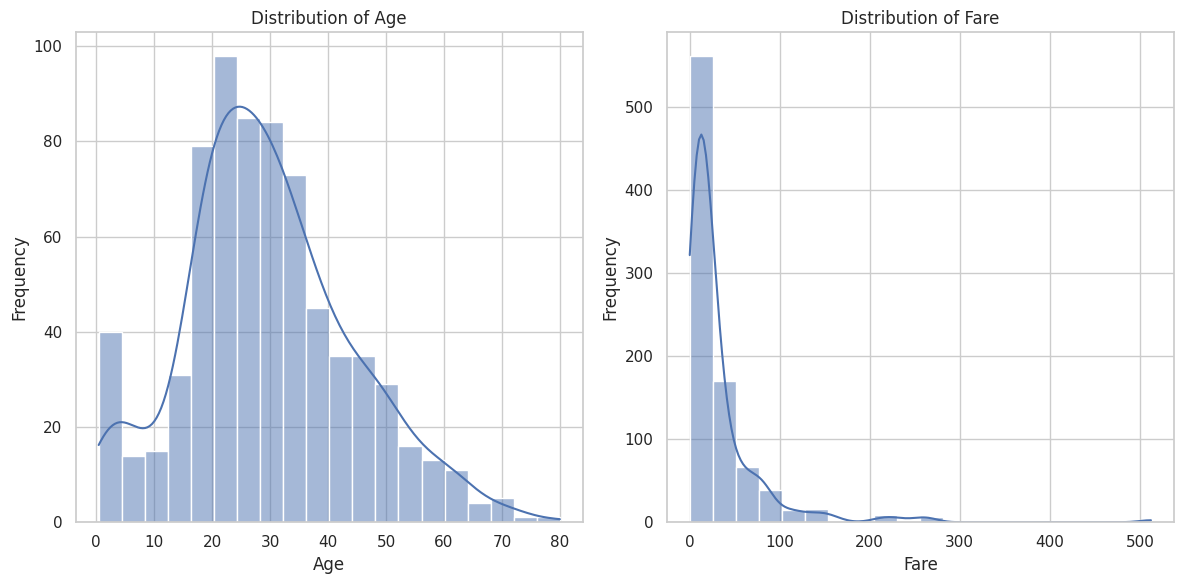

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the plotting style
sns.set(style="whitegrid")

# Createing a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for Age
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution plot for Fare
sns.histplot(data=df, x='Fare', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

plt.show()

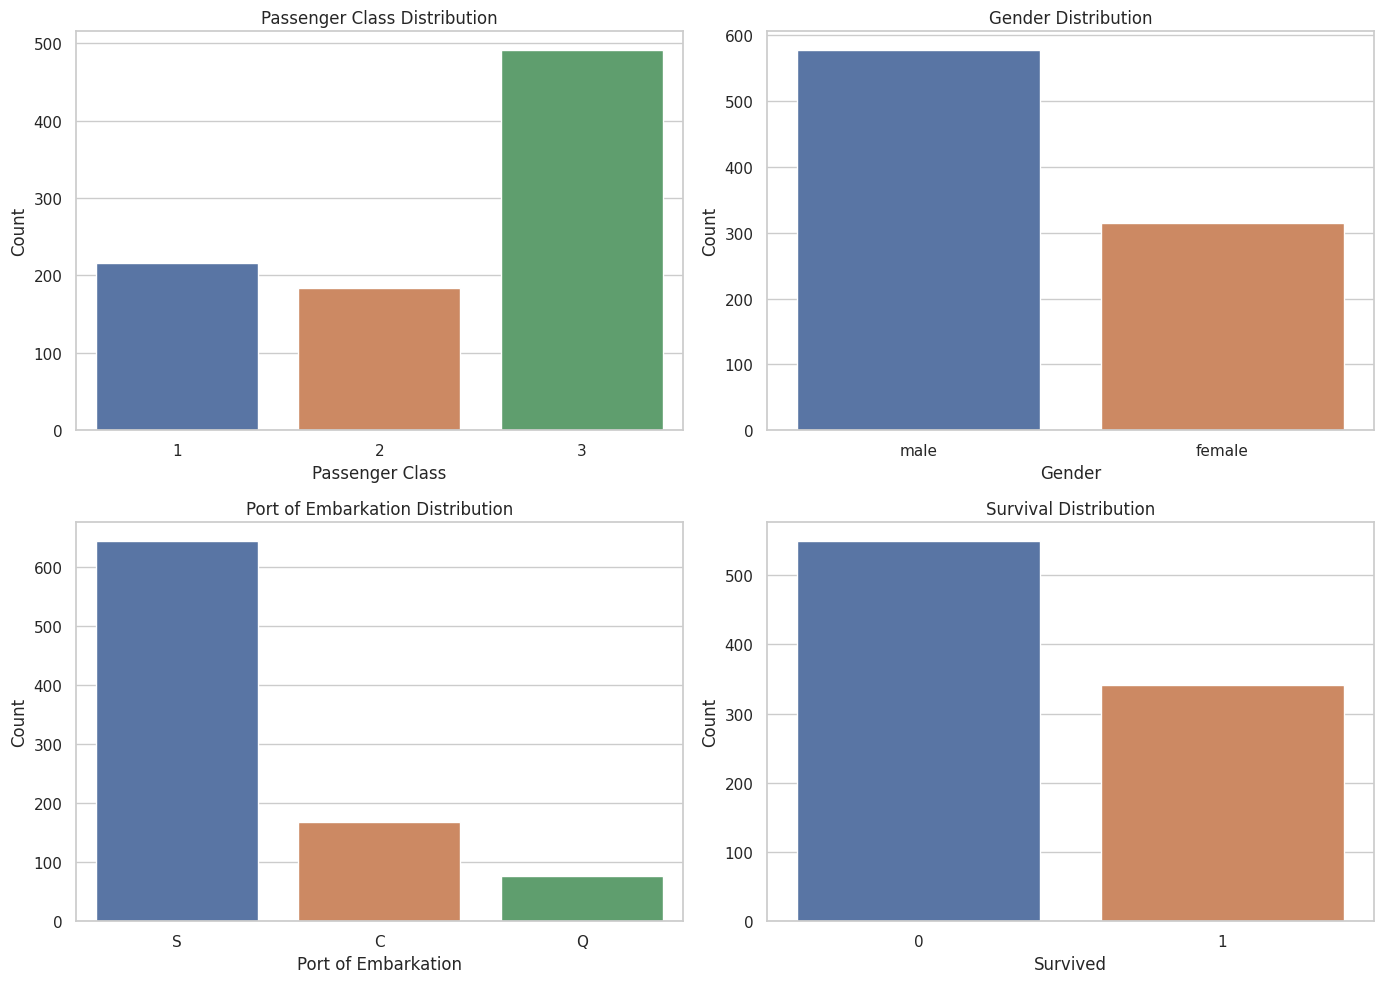

In [ ]:
# Setting up the plotting style
sns.set(style="whitegrid")

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Bar plot for Pclass (Passenger Class)
sns.countplot(data=df, x='Pclass', ax=axes[0, 0])
axes[0, 0].set_title('Passenger Class Distribution')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Count')

# Bar plot for Sex
sns.countplot(data=df, x='Sex', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Bar plot for Embarked
sns.countplot(data=df, x='Embarked', ax=axes[1, 0])
axes[1, 0].set_title('Port of Embarkation Distribution')
axes[1, 0].set_xlabel('Port of Embarkation')
axes[1, 0].set_ylabel('Count')

# Bar plot for Survived
sns.countplot(data=df, x='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Survival Distribution')
axes[1, 1].set_xlabel('Survived')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()

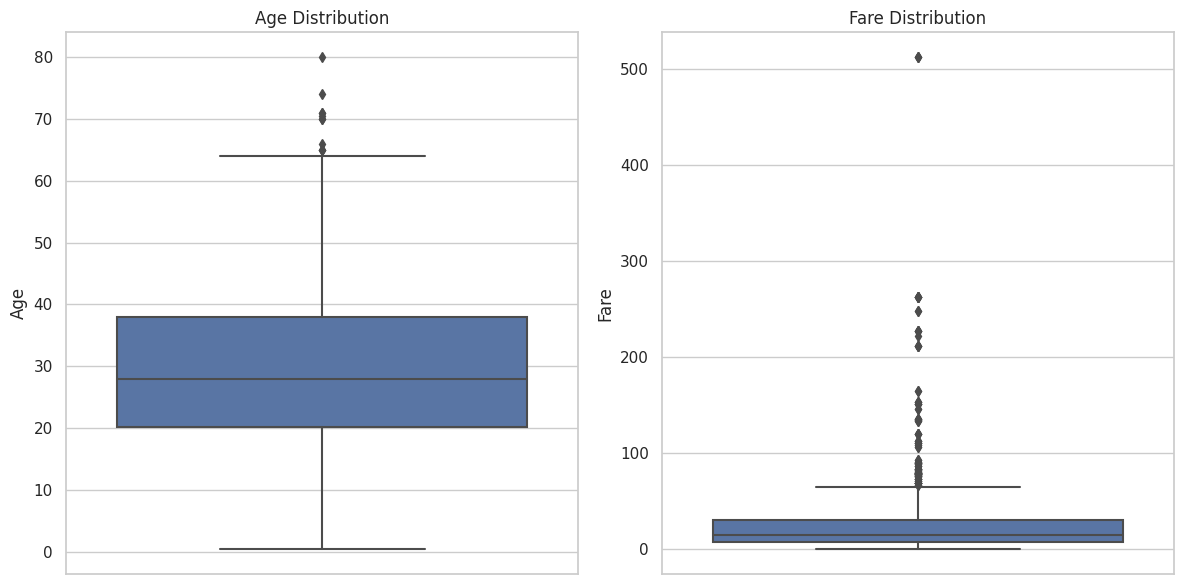

In [ ]:
# Setting up the plotting style
sns.set(style="whitegrid")

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for Age
sns.boxplot(data=df, y='Age', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_ylabel('Age')

# Box plot for Fare
sns.boxplot(data=df, y='Fare', ax=axes[1])
axes[1].set_title('Fare Distribution')
axes[1].set_ylabel('Fare')

# Adjust layout
plt.tight_layout()

plt.show()

As can be seen, there are outliers in Age category

In [ ]:
# Calculating the IQR for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# to count the number of outliers in Fare
num_outliers = len(df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)])

# To display the number of outliers
print(f'Number of outliers in Fare: {num_outliers}')

Number of outliers in Fare: 116


116 is a high number and removing them means removing other valueable information along with outliers. So, let me adjust threshold to identify more extreme outliers.

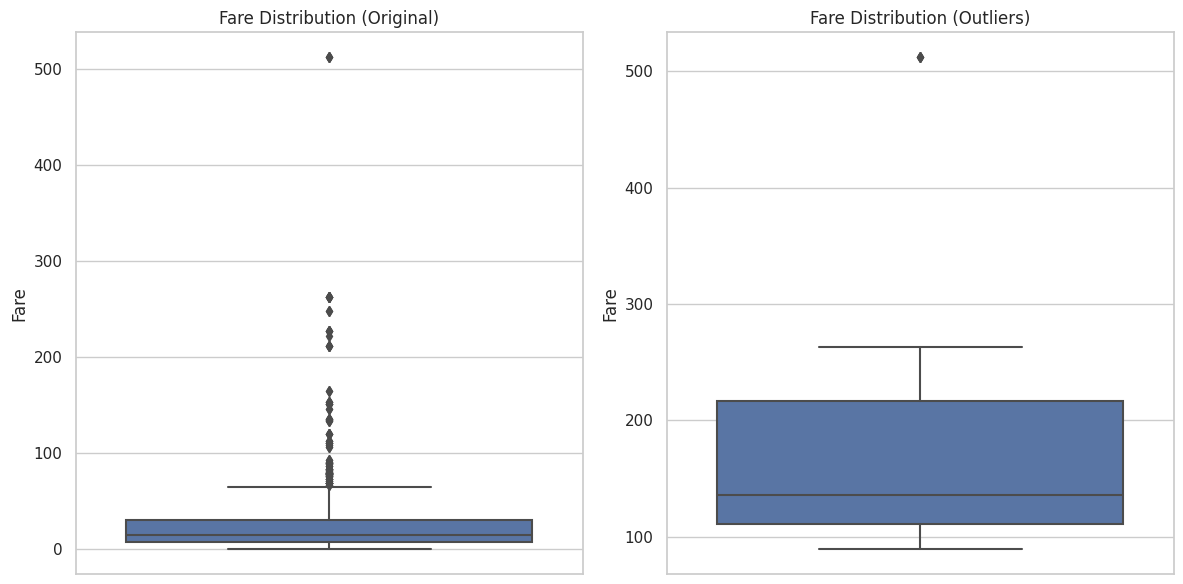

Number of remaining outliers in Fare after adjustment: 63


In [ ]:
# To create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Calculate the adjusted upper and lower bounds for outliers
adjusted_lower_bound = Q1 - 2.5 * IQR  # Adjusted threshold
adjusted_upper_bound = Q3 + 2.5 * IQR  # Adjusted threshold

# Identify outliers based on adjusted bounds
outliers = df[(df['Fare'] < adjusted_lower_bound) | (df['Fare'] > adjusted_upper_bound)]

# Box plot for Fare with adjusted bounds
sns.boxplot(data=df, y='Fare', ax=axes[0])
axes[0].set_title('Fare Distribution (Original)')
axes[0].set_ylabel('Fare')

# Box plot for Fare with adjusted bounds
sns.boxplot(data=outliers, y='Fare', ax=axes[1])
axes[1].set_title('Fare Distribution (Outliers)')
axes[1].set_ylabel('Fare')

# Adjust layout
plt.tight_layout()

plt.show()

# To print the number of remaining outliers
num_remaining_outliers = len(outliers)
print(f'Number of remaining outliers in Fare after adjustment: {num_remaining_outliers}')

In [ ]:
# lets analyze Fare vector in more details. are those 63 records are really outliers?

# Identify fares above the adjusted upper bound
high_fares = df[df['Fare'] > adjusted_upper_bound]

# Create a frequency distribution of high 'Fare' values
fare_counts = high_fares['Fare'].value_counts()

# Display the frequency distribution
print("Fare Amount  |  Frequency")
print("-" * 27)
for fare, count in fare_counts.items():
    print(f"${fare:.2f}  |  {count}")

Fare Amount  |  Frequency
---------------------------
$263.00  |  4
$120.00  |  4
$227.53  |  4
$90.00  |  4
$110.88  |  4
$151.55  |  4
$135.63  |  3
$211.34  |  3
$153.46  |  3
$512.33  |  3
$113.28  |  3
$91.08  |  2
$108.90  |  2
$146.52  |  2
$164.87  |  2
$134.50  |  2
$133.65  |  2
$247.52  |  2
$89.10  |  2
$93.50  |  2
$106.42  |  2
$262.38  |  2
$211.50  |  1
$221.78  |  1


Since the higher fare values are repeated several times, I belive these values are not outliers, so we will keep them.

Now, I will begin with bivariate analysis. Firstly I will see how each numerical variable affects Survival of the pessenger. I will generate pairplot and Heatmap to perform the same.

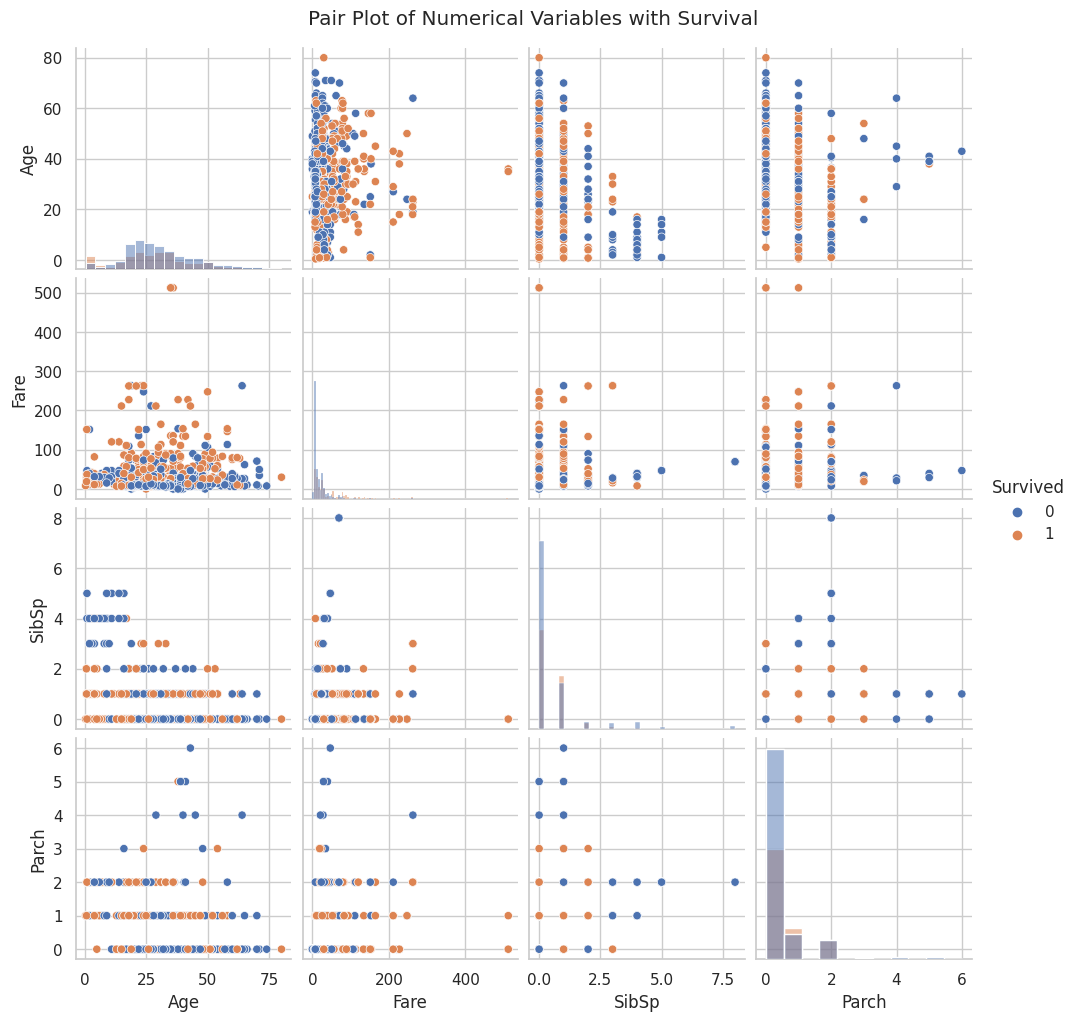

In [ ]:
# Select numerical variables for the pair plot
numerical_vars = ['Age', 'Fare', 'SibSp', 'Parch']

# Add 'Survived' to the numerical variables list
numerical_vars_with_survived = numerical_vars + ['Survived']

# Create a pair plot with 'Survived'
sns.pairplot(data=df[numerical_vars_with_survived], hue='Survived', kind='scatter', diag_kind='hist')

# Add a title
plt.suptitle("Pair Plot of Numerical Variables with Survival", y=1.02)

# Show the plot
plt.show()

One noticable observation from the pair plot is that higher fare value increses the chances of survival.

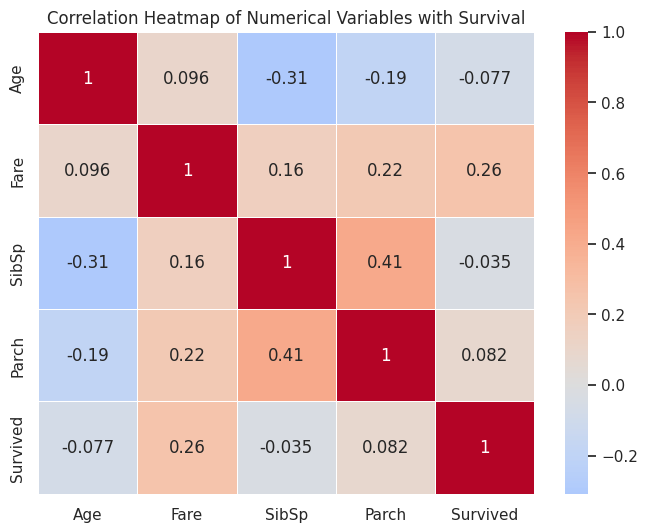

In [ ]:
# Calculate the correlation matrix including 'Survived'
correlation_matrix_with_survived = df[numerical_vars_with_survived].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix_with_survived, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap of Numerical Variables with Survival")

# Show the plot
plt.show()

Same as pairport, heatmap also affirms the fact that variable 'Fare' has higher impact of 'Survival' rate, while 'Age' and 'Survived' variables are inverstly related, which means higher the age, lesser the chances of survival. This is maybe because on the day of mishap at Titanic, women and children were given first priority in evacuation.

Now, lets see how categorical variable are related to survival rate.

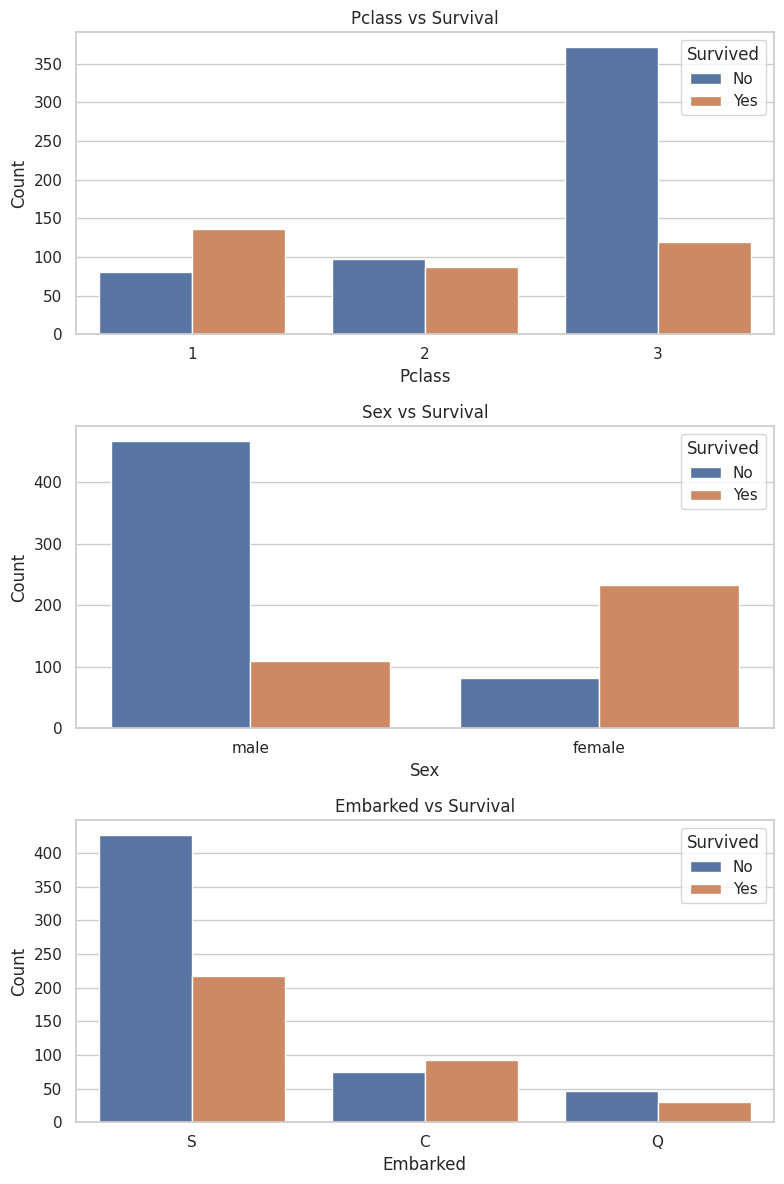

In [ ]:
# Select categorical variables for analysis
categorical_vars = ['Pclass', 'Sex', 'Embarked']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(8, 12))

# Loop through categorical variables and create bar plots
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue='Survived', ax=axes[i])
    axes[i].set_title(f'{var} vs Survival')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Survived', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

As can be seen from the bar plot above,
* Pessenger class 3 has more casualty and pessenger class 1 has more survivors.
* As expected, Male has more casulaty compared to females, as on the day of incident, females and childs were given priority in evacuation.
* More people aboarded ship from Southampton and hence it has more casualty and survival rate.



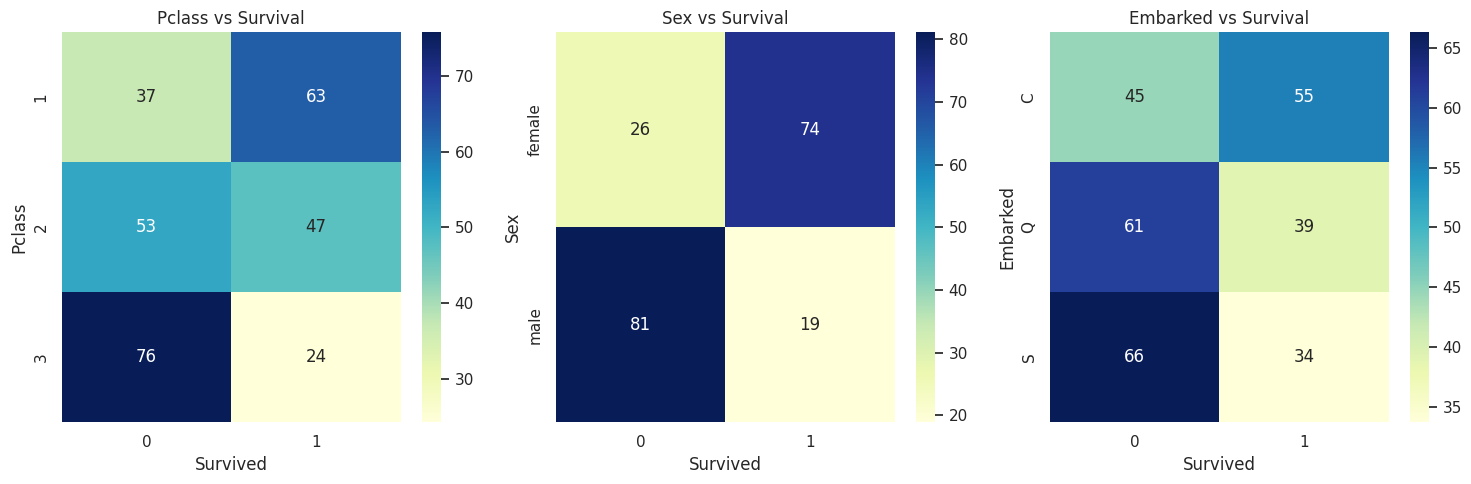

In [ ]:
# Select categorical variables for analysis
categorical_vars = ['Pclass', 'Sex', 'Embarked']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(15, 5))

# Loop through categorical variables and create contingency tables
for i, var in enumerate(categorical_vars):
    contingency_table = pd.crosstab(df[var], df['Survived'], normalize='index') * 100
    sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', ax=axes[i])
    axes[i].set_title(f'{var} vs Survival')
    axes[i].set_xlabel('Survived')
    axes[i].set_ylabel(var)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

AS can be seen, variables 'Sex' and 'Pclass' has more close relationship with survival rate compared to variable 'Embarked'.

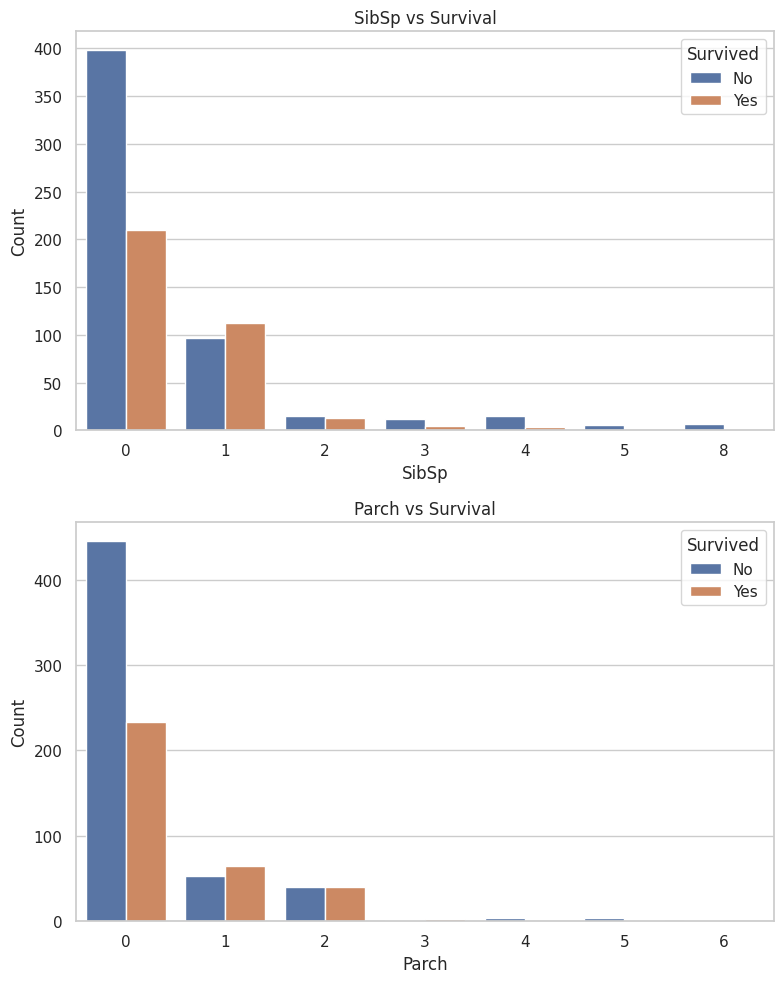

In [ ]:
# Select remaining categorical variables for analysis
categorical_vars = ['SibSp', 'Parch']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(8, 10))

# Loop through categorical variables and create bar plots
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue='Survived', ax=axes[i])
    axes[i].set_title(f'{var} vs Survival')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Survived', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

 One noticable overservation from the above bar plot is that pessengers with one sibling or spouse has high survival rate compared to casualty rate and same is with parents and children.

Now after the corelations, lets analyse missing values.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

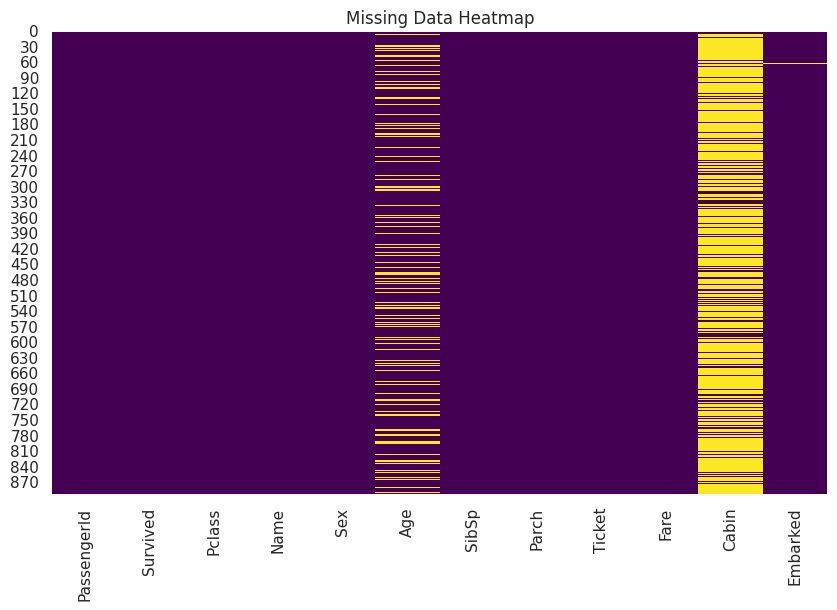

In [ ]:
# Create a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add a title
plt.title("Missing Data Heatmap")

# Show the plot
plt.show()

In [ ]:
# Calculate the percentage of missing values for each variable
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the missing percentage for each variable
print("Missing Data Percentage:")
print(missing_percentage)

Missing Data Percentage:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


variable Age is 19% missing values and hence it can be imputed. While Cabin variable has 77% of missing values, so it can be dropped. Missing value for Embarked can also be imputed. I have done these steps on my other notebook with Titanic dataset.

Now, lets do some statistical analysis.

T-Statistic: -2.06668694625381
P-Value: 0.03912465401348249


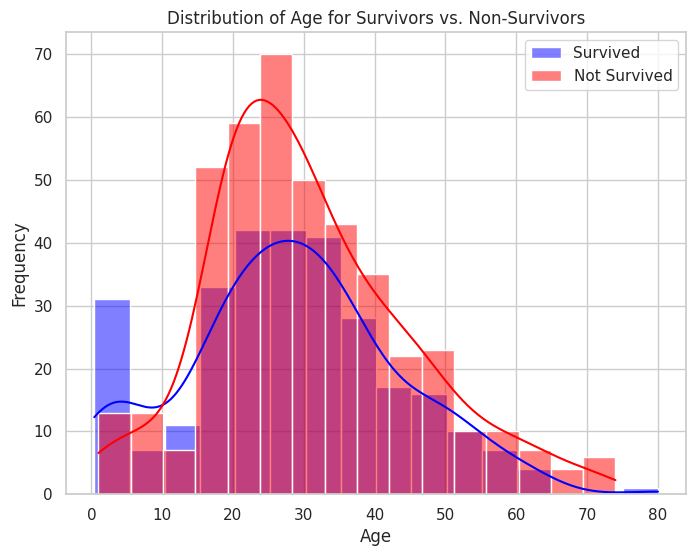

Reject Null Hypothesis: The means of 'Age' are significantly different between survivors and non-survivors.


In [ ]:
from scipy.stats import ttest_ind

# Separate 'Age' values for survivors and non-survivors
age_survived = df[df['Survived'] == 1]['Age']
age_not_survived = df[df['Survived'] == 0]['Age']

# Perform independent t-test
t_statistic, p_value = ttest_ind(age_survived, age_not_survived, nan_policy='omit')

# Display results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Plot the distribution of 'Age' for survivors and non-survivors
plt.figure(figsize=(8, 6))
sns.histplot(data=age_survived, label='Survived', color='blue', kde=True)
sns.histplot(data=age_not_survived, label='Not Survived', color='red', kde=True)
plt.title("Distribution of Age for Survivors vs. Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Interpret results based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: The means of 'Age' are significantly different between survivors and non-survivors.")
else:
    print("Fail to Reject Null Hypothesis: The means of 'Age' are not significantly different between survivors and non-survivors.")

As can be seen from above, average of survivors are slightly less then the age of non survivors.